Costruiamo ora una rete neurale convoluzionale, e valutiamo le sue performance sia sul data set del mnist, sia con delle cifre scritte da noi

Per prima cosa carichiamo i dati: 

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
input_shape = (img_rows, img_cols, 1)
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

X_train = np.expand_dims(X_train, axis= -1)
X_test = np.expand_dims(X_test, axis=-1)

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

2025-06-12 15:08:09.223742: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 15:08:09.224569: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 15:08:09.229596: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-12 15:08:09.239237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749733689.253151  426636 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749733689.25

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


Definiamo la funzione che crei e compili la CNN: 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 6 filters
    model.add(Conv2D(6, kernel_size=(5, 5), 
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    #second convolutional layer, followed by another max pooling layer
    model.add(Conv2D(16, kernel_size = (5, 5), activation= 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    
    
    #now I flatten the data before passing it to the final DNN
    model.add(Flatten())
    
    #final DNN
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Ora possiamo "allenare" la nostra rete neurale. Scegliamo $N_{epoch} =30$, come avevamo scelto anche per la DNN. 

In [3]:
# training parameters
batch_size = 32
epochs = 30 

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/giacomo_galliani/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-12 15:08:20.095580: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.6830 - loss: 0.9845 - val_acc: 0.9516 - val_loss: 0.1578
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.9534 - loss: 0.1557 - val_acc: 0.9699 - val_loss: 0.1018
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9665 - loss: 0.1092 - val_acc: 0.9760 - val_loss: 0.0791
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.9729 - loss: 0.0876 - val_acc: 0.9789 - val_loss: 0.0664
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9770 - loss: 0.0745 - val_acc: 0.9808 - val_loss: 0.0588
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9805 - loss: 0.0653 - val_acc: 0.9819 - val_loss: 0.0539
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.9825 - loss: 0.0583 - val_acc: 0.9824 - val_loss: 0.0511
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.9841 - loss: 0.0528 - val_acc: 0.9836 - val_loss: 0.0481
Epoch 9/30
1875/1875 ━━━━━━━━━━

Osserviamo che la loss e la acccuracy sono molto migliori rispetto alla DNN, a pari numero di epoche

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 28, 28, 1)


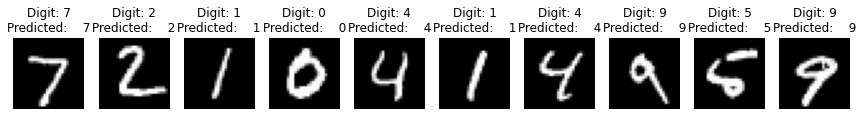

In [4]:
predictions = model_CNN.predict(X_test)
print(X_test.shape)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Vediamo dunque che, come la DNN, la CNN riesce a predirre correttamente tutte queste immagini. Proviamo a vedere allora come si comporta con delle immagini scritte a mano fuori dal train set del mnist:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


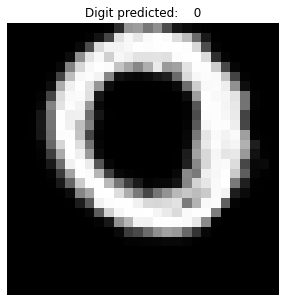

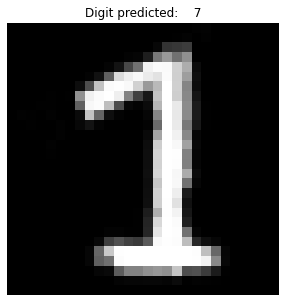

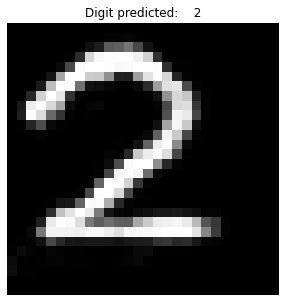

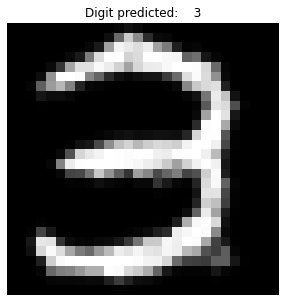

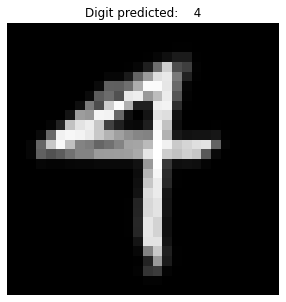

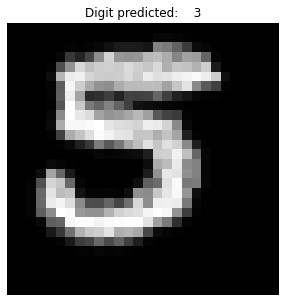

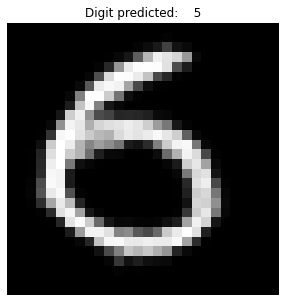

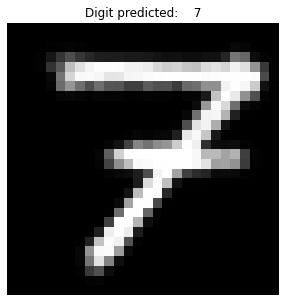

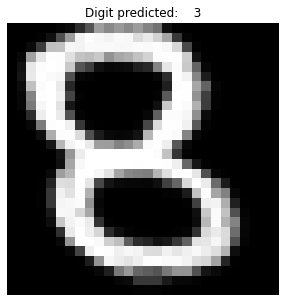

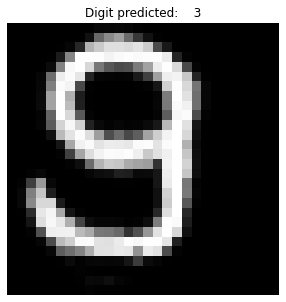

In [10]:
from PIL import Image
import os



#import images 
data = np.zeros((10, 1, 28, 28,1))
for l in range(10):
    digit_filename = f"{l}.png"
    digit_in = Image.open(digit_filename).convert('L')


    ydim, xdim = digit_in.size
    pix=digit_in.load();
    for j in range(ydim):
        for i in range(xdim):
            data[l, :, i,j]=pix[j,i]

    data[l] /= 255
    data[l] = data[l].reshape(1, xdim, ydim, 1)


#predict data    
for i in range(10):
    pred_0[i] = model_CNN.predict(data[i])

data = data.reshape(10, 28, 28)

#show figures and predictions 
for i in range (10): 
    plt.figure(figsize=(5, 5))  
    plt.imshow(data[i], cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0[i])))
    plt.axis('off') 
    plt.show()

Come è possibile vedere, quando si usano cifre scritte in modo diverso dal data set di training, la CNN fa fatica a riconoscere correttamente le cifre. I fattori che contribuiscono alla diversità fra le cifre scritte a mano da me e il training set del mnist sono lo stile americano/europeo, e anche il fatto che le mie cifre occupano quasi tutta la figura rispetto al training set, nel quale le cifre sembrano essere più piccole: questo è un fattore che disturba i layer convoluzionali. 